In [1]:
#Note
#https://www.kaggle.com/code/prashant111/recommender-systems-in-python

## Recommender Systems

### A recommender system is a data science application that is used to predict or offer products to customers based on their past purchase or browsing history.

### At the core, a recommender system employs a machine learning algorithm whose job is to predict user's ratings for a particular entity.

### It is based on the similarity based on the entities or users that previously rated those entities.

### The idea is that similar types of users are likely to have similar ratings for a set of entities.

### Recommender Systems Mechanism 

#### Basically, a recommendation engine filters the data using different algorithms and recommends the most relevant items to users.

#### It first studies the past behaviour of a customer and based on that recommends products which he might buy.

#### The working of a recommendation engine can be categorized in three steps-
#### 1. Data collection
#### 2. Data storage
#### 3. Filtering the data

####  There are two major approaches to filter the data to extract relevant information. These are as follows:-

####  a. Collaborative Filtering – based on similar users.
####  b. Content-Based Filtering – based on product attributes.

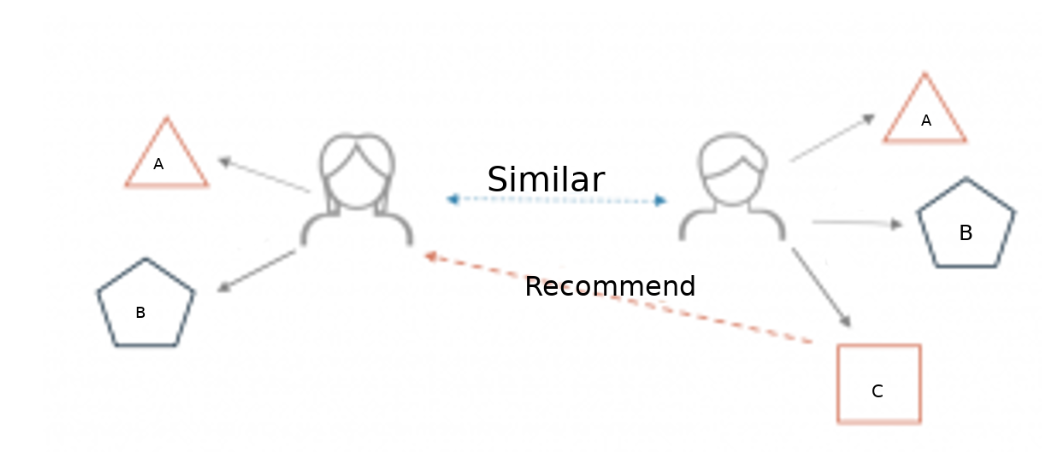

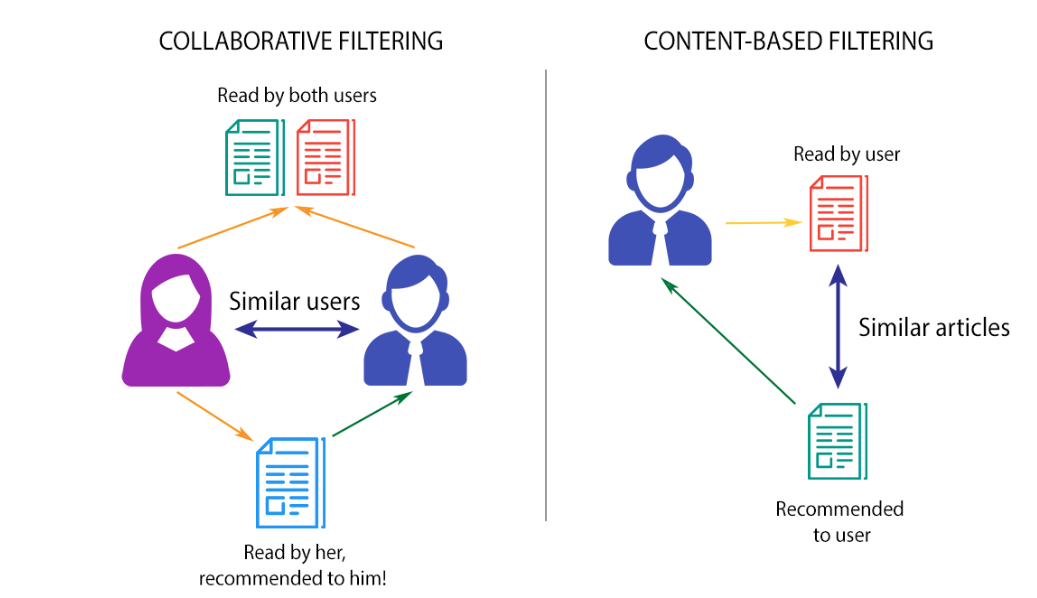

###  Collaborative Filtering Recommender System

#### Collaborative filtering approach build a model from a user’s past behaviour (items previously purchased or selected and/or numerical ratings given to those items) as well as similar decisions made by other users.
#### This model is then used to predict items (or ratings for items) that the user may have an interest in.
#### It recommends based on the user’s rating in the past.
#### These systems try to predict the user’s rating or preferences based on past rating or preferences of other users.

### There are two types of collaborative filtering recommender system. They are:-
#### 1. User-based collaborative filtering:  In this method products are recommended to a user based on the fact that the products have been liked by users similar to the user.
#### 2. Item-based collaborative filtering:  This method identifies and predict similar items based on users’ previous ratings.

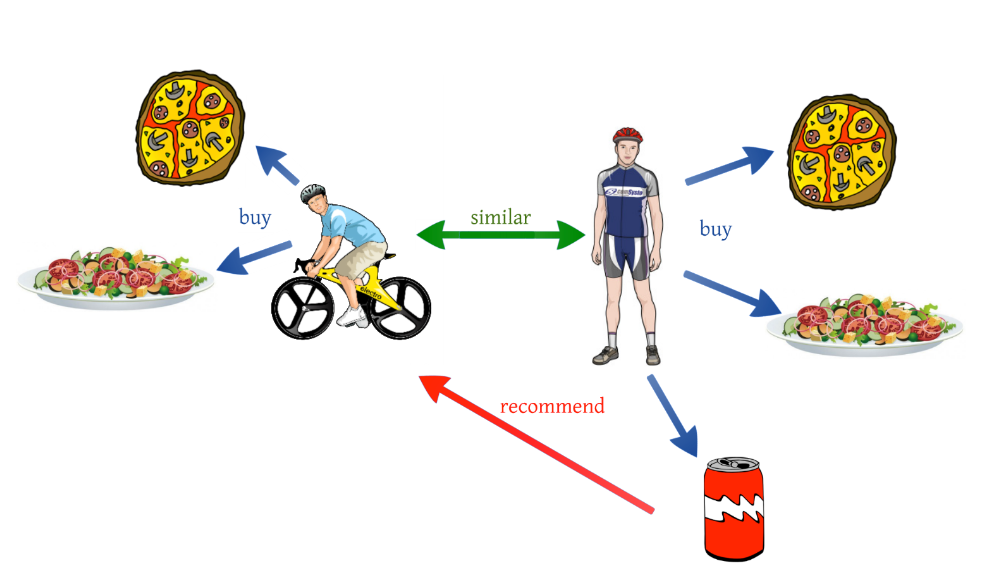

#### Collaborative filtering methods are also classified as memory-based and model-based
#### An example of memory-based approach is the user-based algorithm while that of model-based approach is Kernel-Mapping Recommender.
#### Collaborative filtering approaches often suffer from three problems -

#### cold start
#### scalability
#### sparsity

###  Content-based Filtering Recommender System 
#### Content-based filtering methods are based on a description of the item and a profile of the user’s preferences.
#### These methods are best suited to situations where there is known data on an item (name, location, description, etc.), but not on the user.

#### These methods are best suited to situations where there is known data on an item (name, location, description, etc.), but not on the user.

#### In content based filtering recommender system, the similarity between different products is calculated on the basis of the attributes of the products.

#### The system uses the knowledge of each product to recommend a new product.

#### Content-based filtering approaches utilize a series of discrete characteristics of an item in order to recommend additional items with similar properties.

#### For example, in a content based movie recommender system, the similarities between the movies is calculated on the basis of genres, the actors and the director.

#### The general idea behind these recommender systems is that if a person liked a particular item, then he will also like an item similar to it.

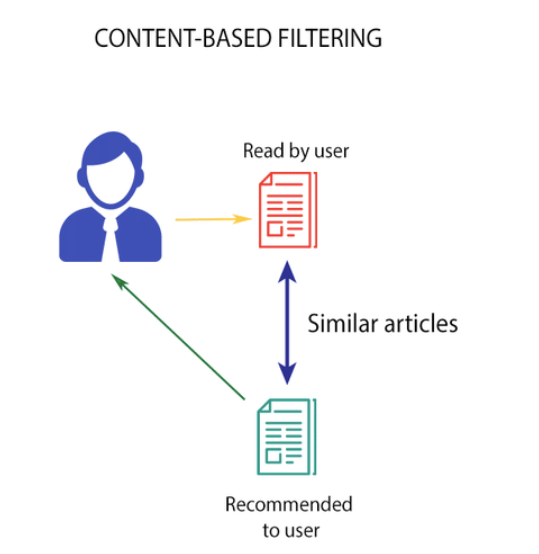

### Evaluating Recommender Systems

#### Once we develop a recommender system, we want to evaluate them.

#### Evaluation is important in assessing the effectiveness of recommender systems.

#### To measure the effectiveness of recommender systems, three types of evaluations are available –

#### 1. user studies,
#### 2. online evaluations (A/B tests), and
#### 3. offline evaluations.


#### Beyond measures of accuracy
#### Research on recommender systems is focussed towards finding the most accurate recommendation algorithms. There are a number of factors that are also important. These are discussed below.

#### Diversity – Users tend to be more satisfied with recommendations when there is a higher intra-list diversity. For example, items from different artists.

#### Recommender persistence – Sometimes, it is more effective to re-show recommendations than showing new items. There are several reasons for this. Users may ignore items when they are shown for the first time. May be they do not inspect the recommendations initially.

#### Privacy – Recommender systems usually have to deal with privacy concerns because users have to reveal sensitive information.

#### User demographics – User demographics may influence how satisfied users are with recommendations.

#### Robustness – When users can participate in the recommender system, the issue of fraud must be addressed.

#### Serendipity – Serendipity is a measure of how surprising the recommendations are. For instance, a recommender system that recommends milk to a customer in a grocery store might be perfectly accurate. But it is not a good recommendation because it is an obvious item for the customer to buy.

#### Trust – A recommender system is of little value for a user if the user does not trust the system. Trust can be built by a recommender system by explaining how it generates recommendations, and why it recommends an item.

#### Labelling – User satisfaction with recommendations may be influenced by the labelling of the recommendations.

# Content Based Recommender System

In [95]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt # data visualization
import seaborn as sns           # statistical data visualization
%matplotlib inline
plt.style.use('fivethirtyeight')
pd.set_option('display.max_colwidth', None)

In [96]:
movies = pd.read_csv('C:/BITsPilaniMTECH2123/Sem2/ML/ML_Practice_2023/data/tmdb_5000_movies.csv')
credits = pd.read_csv('C:/BITsPilaniMTECH2123/Sem2/ML/ML_Practice_2023/data/tmdb_5000_credits.csv')

In [97]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 878, ""name"": ""Science Fiction""}]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""space war""}, {""id"": 3388, ""name"": ""space colony""}, {""id"": 3679, ""name"": ""society""}, {""id"": 3801, ""name"": ""space travel""}, {""id"": 9685, ""name"": ""futuristic""}, {""id"": 9840, ""name"": ""romance""}, {""id"": 9882, ""name"": ""space""}, {""id"": 9951, ""name"": ""alien""}, {""id"": 10148, ""name"": ""tribe""}, {""id"": 10158, ""name"": ""alien planet""}, {""id"": 10987, ""name"": ""cgi""}, {""id"": 11399, ""name"": ""marine""}, {""id"": 13065, ""name"": ""soldier""}, {""id"": 14643, ""name"": ""battle""}, {""id"": 14720, ""name"": ""love affair""}, {""id"": 165431, ""name"": ""anti war""}, {""id"": 193554, ""name"": ""power relations""}, {""id"": 206690, ""name"": ""mind and soul""}, {""id"": 209714, ""name"": ""3d""}]",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporation"", ""id"": 306}, {""name"": ""Dune Entertainment"", ""id"": 444}, {""name"": ""Lightstorm Entertainment"", ""id"": 574}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}, {""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, {""id"": 911, ""name"": ""exotic island""}, {""id"": 1319, ""name"": ""east india trading company""}, {""id"": 2038, ""name"": ""love of one's life""}, {""id"": 2052, ""name"": ""traitor""}, {""id"": 2580, ""name"": ""shipwreck""}, {""id"": 2660, ""name"": ""strong woman""}, {""id"": 3799, ""name"": ""ship""}, {""id"": 5740, ""name"": ""alliance""}, {""id"": 5941, ""name"": ""calypso""}, {""id"": 6155, ""name"": ""afterlife""}, {""id"": 6211, ""name"": ""fighter""}, {""id"": 12988, ""name"": ""pirate""}, {""id"": 157186, ""name"": ""swashbuckler""}, {""id"": 179430, ""name"": ""aftercreditsstinger""}]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Jerry Bruckheimer Films"", ""id"": 130}, {""name"": ""Second Mate Productions"", ""id"": 19936}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [98]:
credits.head(2)

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [99]:
movies = movies.merge(credits,on='title')
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]
movies.head(2)

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   

                                                                                                                                                                           overview  \
0   In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.   
1  Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.   

                                                                                                                                   genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]   
1                                          [{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          keywords  \
0  [{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]   
1                                                                                                                                                   [{"id": 270, "name": "ocean"}, {"id": 726, "name": "drug abuse"}, {"id": 911, "name": "exotic island"}, {"id": 1319, "name": "east india trading company"}, {"id": 2038, "name": "love of one's life"}, {"id": 2052, "name": "traitor"}, {"id": 2580, "name": "shipwreck"}, {"id": 2660, "name": "strong woman"}, {"id": 3799, "name": "ship"}, {"id": 5740, "name": "alliance"}, {"id": 5941, "name": "calypso"}, {"id": 6155, "name": "afterlife"}, {"id": 6211, "name": "fighter"}, {"id": 12988, "name": "pirate"}, {"id": 157186, "name": "swashbuckler"}, {"id": 179430, "name": "aftercreditsstinger"}]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [100]:
movies.dropna(inplace=True)
movies.shape

(4806, 7)

In [101]:
import ast
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L

In [102]:
movies['genres'] = movies['genres'].apply(convert)
movies.head(1)

movie_id   title  \
0     19995  Avatar   

                                                                                                                                                                          overview  \
0  In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.   

                                          genres  \
0  [Action, Adventure, Fantasy, Science Fiction]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          keywords  \
0  [{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [103]:
movies['keywords'] = movies['keywords'].apply(convert)
movies.head(1)

movie_id   title  \
0     19995  Avatar   

                                                                                                                                                                          overview  \
0  In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.   

                                          genres  \
0  [Action, Adventure, Fantasy, Science Fiction]   

                                                                                                                                                                                                                   keywords  \
0  [culture clash, future, space war, space colony, society, space travel, futuristic, romance, space, alien, tribe, alien planet, cgi, marine, soldier, battle, love affair, anti war, power relations, mind and soul, 3d]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [60]:
def convert3(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L 

In [104]:
movies['cast'] = movies['cast'].apply(convert)
movies.head(1)

movie_id   title  \
0     19995  Avatar   

                                                                                                                                                                          overview  \
0  In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.   

                                          genres  \
0  [Action, Adventure, Fantasy, Science Fiction]   

                                                                                                                                                                                                                   keywords  \
0  [culture clash, future, space war, space colony, society, space travel, futuristic, romance, space, alien, tribe, alien planet, cgi, marine, soldier, battle, love affair, anti war, power relations, mind and soul, 3d]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             cast  \
0  [Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang, Michelle Rodriguez, Giovanni Ribisi, Joel David Moore, CCH Pounder, Wes Studi, Laz Alonso, Dileep Rao, Matt Gerald, Sean Anthony Moran, Jason Whyte, Scott Lawrence, Kelly Kilgour, James Patrick Pitt, Sean Patrick Murphy, Peter Dillon, Kevin Dorman, Kelson Henderson, David Van Horn, Jacob Tomuri, Michael Blain-Rozgay, Jon Curry, Luke Hawker, Woody Schultz, Peter Mensah, Sonia Yee, Jahnel Curfman, Ilram Choi, Kyla Warren, Lisa Roumain, Debra Wilson, Chris Mala, Taylor Kibby, Jodie Landau, Julie Lamm, Cullen B. Madden, Joseph Brady Madden, Frankie Torres, Austin Wilson, Sara Wilson, Tamica Washington-Miller, Lucy Briant, Nathan Meister, Gerry Blair, Matthew Chamberlain, Paul Yates, Wray Wilson, James Gaylyn, Melvin Leno Clark III, Carvon Futrell, Brandon Jelkes, Micah Moch, Hanniyah Muhammad, Christopher Nolen, Christa Oliver, April Marie Thomas, Bravita A. Threatt, Colin Bleasdale, Mike Bodnar, Matt Clayton, Nicole Dionne, Jamie Harrison, Allan Henry, Anthony Ingruber, Ashley Jeffery, Dean Knowsley, Joseph Mika-Hunt, Terry Notary, Kai Pantano, Logan Pithyou, Stuart Pollock, Raja, Gareth Ruck, Rhian Sheehan, T. J. Storm, Jodie Taylor, Alicia Vela-Bailey, Richard Whiteside, Nikie Zambo, Julene Renee]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [105]:
movies['cast'] = movies['cast'].apply(lambda x:x[0:3])

In [106]:
movies.head(2)

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   

                                                                                                                                                                           overview  \
0   In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.   
1  Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.   

                                          genres  \
0  [Action, Adventure, Fantasy, Science Fiction]   
1                   [Adventure, Fantasy, Action]   

                                                                                                                                                                                                                   keywords  \
0  [culture clash, future, space war, space colony, society, space travel, futuristic, romance, space, alien, tribe, alien planet, cgi, marine, soldier, battle, love affair, anti war, power relations, mind and soul, 3d]   
1              [ocean, drug abuse, exotic island, east india trading company, love of one's life, traitor, shipwreck, strong woman, ship, alliance, calypso, afterlife, fighter, pirate, swashbuckler, aftercreditsstinger]   

                                               cast  \
0  [Sam Worthington, Zoe Saldana, Sigourney Weaver]   
1     [Johnny Depp, Orlando Bloom, Keira Knightley]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [107]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L 

In [108]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [109]:
movies.sample(5)

,movie_id,title,overview,genres,keywords,cast,crew
1571,22947,Up in the Air,"George Clooney plays the dry cynical character of Ryan Bingham, an executive who specializes in ""downsizing"". Ryan lives out of his suitcase, traveling the country for the sole purpose terminating unwanted employees day after day. Just as Ryan is about to reach his life-long goal of the ten million mile frequent flyer mark some major changes come his way. Changes that threaten to crack the cold heartless exterior that is Ryan Bingham.","[Drama, Romance]","[suitcase, business, omaha, on the road, downsizing, cross country, duringcreditsstinger]","[George Clooney, Vera Farmiga, Anna Kendrick]",[Jason Reitman]
751,16558,Duplicity,Two romantically-engaged corporate spies team up to manipulate a corporate race to corner the market on a medical innovation that will reap huge profits and enable them to lead an extravagant lifestyle together.,"[Romance, Comedy, Crime]",[spy],"[Clive Owen, Julia Roberts, Paul Giamatti]",[Tony Gilroy]
3444,218,The Terminator,"In the post-apocalyptic future, reigning tyrannical supercomputers teleport a cyborg assassin known as the ""Terminator"" back to 1984 to kill Sarah Connor, whose unborn son is destined to lead insurgents against 21st century mechanical hegemony. Meanwhile, the human-resistance movement dispatches a lone warrior to safeguard Sarah. Can he stop the virtually indestructible killing machine?","[Action, Thriller, Science Fiction]","[saving the world, artificial intelligence, rebel, cyborg, shotgun, killer robot, sun glasses, dystopia, car chase, laser gun, urban setting, future war]","[Arnold Schwarzenegger, Michael Biehn, Linda Hamilton]",[James Cameron]
3115,31007,Welcome to the Rileys,"Years after their teenage daughter’s death, Lois and Doug Riley, an upstanding Indiana couple, are frozen by estranging grief. Doug escapes to New Orleans on a business trip. Compelled by urgencies he doesn’t understand, he insinuates himself into the life of an underage hooker, becoming her platonic guardian.",[Drama],"[prostitute, rape, stripper, independent film, teenage girl, smoking marijuana]","[Kristen Stewart, James Gandolfini, Melissa Leo]",[Jake Scott]
3361,2074,Flirting with Disaster,"Adopted as a child, new father Mel Colpin (Ben Stiller) decides he cannot name his son until he knows his birth parents, and determines to make a cross-country quest to find them. Accompanied by his wife, Nancy (Patricia Arquette), and an inept yet gorgeous adoption agent, Tina (Tea Leoni), he departs on an epic road trip that quickly devolves into a farce of mistaken identities, wrong turns, and overzealous and love-struck ATF agents (Josh Brolin, Richard Jenkins).","[Comedy, Romance]","[lsd, looking for birth parents, half-brother, independent film]","[Ben Stiller, Patricia Arquette, Téa Leoni]",[David O. Russell]


In [110]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [111]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)

In [113]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, society, spacetravel, futuristic, romance, space, alien, tribe, alienplanet, cgi, marine, soldier, battle, loveaffair, antiwar, powerrelations, mindandsoul, 3d]","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]


In [114]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())

In [115]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [116]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marine, is, dispatched, to, the, moon, Pandora, on, a, unique, mission,, but, becomes, torn, between, following, orders, and, protecting, an, alien, civilization.]","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, society, spacetravel, futuristic, romance, space, alien, tribe, alienplanet, cgi, marine, soldier, battle, loveaffair, antiwar, powerrelations, mindandsoul, 3d]","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marine, is, dispatched, to, the, moon, Pandora, on, a, unique, mission,, but, becomes, torn, between, following, orders, and, protecting, an, alien, civilization., Action, Adventure, Fantasy, ScienceFiction, cultureclash, future, spacewar, spacecolony, society, spacetravel, futuristic, romance, space, alien, tribe, alienplanet, cgi, marine, soldier, battle, loveaffair, antiwar, powerrelations, mindandsoul, 3d, SamWorthington, ZoeSaldana, SigourneyWeaver, JamesCameron]"


In [117]:
new = movies.drop(columns=['overview','genres','keywords','cast','crew'])

In [118]:
new['tags'] = new['tags'].apply(lambda x: " ".join(x))
new.head(1)

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron"


In [123]:
#Vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [124]:
vector = cv.fit_transform(new['tags']).toarray()

In [125]:
vector.shape

(4806, 5000)

In [126]:
pd.DataFrame(vector)

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


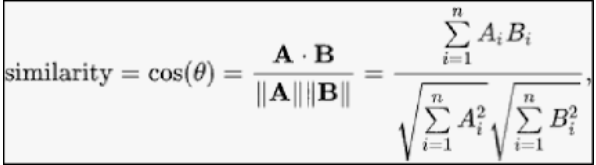

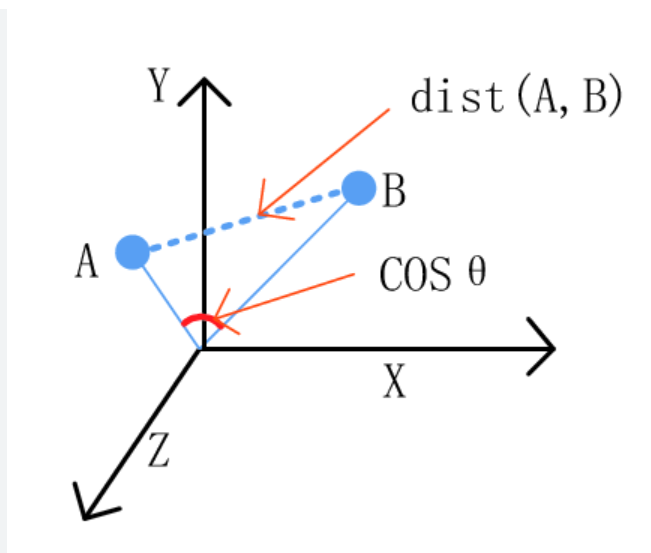

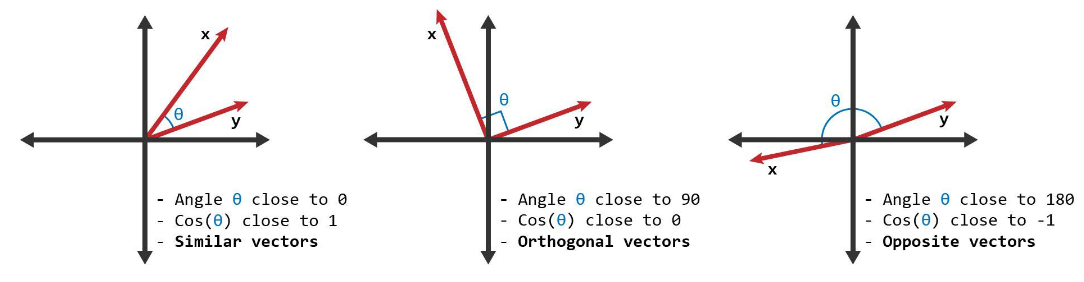

In [77]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)
similarity

C:\Users\Abhishek Jaiswal\.conda\envs\mlenv\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


array([[1.        , 0.08964215, 0.06071767, ..., 0.02519763, 0.0277885 ,
        0.        ],
       [0.08964215, 1.        , 0.06350006, ..., 0.02635231, 0.        ,
        0.        ],
       [0.06071767, 0.06350006, 1.        , ..., 0.02677398, 0.        ,
        0.        ],
       ...,
       [0.02519763, 0.02635231, 0.02677398, ..., 1.        , 0.07352146,
        0.04774099],
       [0.0277885 , 0.        , 0.        , ..., 0.07352146, 1.        ,
        0.05264981],
       [0.        , 0.        , 0.        , ..., 0.04774099, 0.05264981,
        1.        ]])

In [127]:
pd.DataFrame(similarity)

,0,1,2,3,4,5,6,7,8,9,...,4796,4797,4798,4799,4800,4801,4802,4803,4804,4805
0,1.000000,0.089642,0.060718,0.039841,0.182574,0.118345,0.023218,0.176383,0.063888,0.077331,...,0.000000,0.000000,0.021296,0.058849,0.000000,0.024922,0.053452,0.025198,0.027789,0.000000
1,0.089642,1.000000,0.063500,0.020833,0.081832,0.123768,0.024282,0.131762,0.066815,0.080875,...,0.000000,0.000000,0.022272,0.000000,0.000000,0.026064,0.000000,0.026352,0.000000,0.000000
2,0.060718,0.063500,1.000000,0.042333,0.083141,0.075449,0.024671,0.160644,0.067884,0.054779,...,0.048002,0.000000,0.000000,0.000000,0.021467,0.052963,0.000000,0.026774,0.000000,0.000000
3,0.039841,0.020833,0.042333,1.000000,0.036370,0.049507,0.048564,0.070273,0.022272,0.233638,...,0.031497,0.028583,0.014848,0.041030,0.028172,0.052129,0.000000,0.052705,0.058124,0.056614
4,0.182574,0.081832,0.083141,0.036370,1.000000,0.064820,0.063586,0.184017,0.029161,0.094124,...,0.041239,0.000000,0.000000,0.026861,0.000000,0.022751,0.000000,0.023002,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,0.024922,0.026064,0.052963,0.052129,0.022751,0.020646,0.040505,0.065938,0.055728,0.022485,...,0.000000,0.071520,0.000000,0.025666,0.035245,1.000000,0.000000,0.000000,0.024239,0.000000
4802,0.053452,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.076696,0.000000,0.000000,0.000000,0.000000,1.000000,0.094281,0.051988,0.000000
4803,0.025198,0.026352,0.026774,0.052705,0.023002,0.020874,0.000000,0.000000,0.056344,0.045466,...,0.079682,0.036155,0.056344,0.051900,0.000000,0.000000,0.094281,1.000000,0.073521,0.047741
4804,0.027789,0.000000,0.000000,0.058124,0.000000,0.023020,0.022582,0.000000,0.062137,0.025071,...,0.000000,0.039873,0.000000,0.000000,0.000000,0.024239,0.051988,0.073521,1.000000,0.052650


In [78]:
new[new['title'] == 'The Lego Movie'].index[0]

744

In [128]:
new.head(2)

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron"
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems. Adventure Fantasy Action ocean drugabuse exoticisland eastindiatradingcompany loveofone'slife traitor shipwreck strongwoman ship alliance calypso afterlife fighter pirate swashbuckler aftercreditsstinger JohnnyDepp OrlandoBloom KeiraKnightley GoreVerbinski"


In [79]:
def recommend(movie):
    index = new[new['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(new.iloc[i[0]].title)

In [80]:
recommend('Gandhi')

Gandhi, My Father
The Wind That Shakes the Barley
A Passage to India
Guiana 1838
Ramanujan


In [129]:
import pickle
#pickle.dump(new,open('movie_list.pkl','wb'))
#pickle.dump(similarity,open('similarity.pkl','wb'))

# Recommender System

In [131]:
import numpy as np
import pandas as pd

In [132]:
books = pd.read_csv('C:/BITsPilaniMTECH2123/Sem2/ML/ML_Practice_2023/data/books.csv')
users = pd.read_csv('C:/BITsPilaniMTECH2123/Sem2/ML/ML_Practice_2023/data/users.csv')
ratings = pd.read_csv('C:/BITsPilaniMTECH2123/Sem2/ML/ML_Practice_2023/data/ratings.csv')

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_10272\1400537676.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('C:/BITsPilaniMTECH2123/Sem2/ML/ML_Practice_2023/data/books.csv')


In [134]:
users.head(2)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [135]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg


In [136]:
ratings.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


In [137]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [138]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [139]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [140]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [141]:
books.duplicated().sum()

0

In [149]:
## Popularity Based Recommender System
ratings_with_name = ratings.merge(books,on='ISBN')
ratings_with_name = ratings_with_name.dropna()
ratings_with_name.head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg


In [150]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1
4,Beyond IBM: Leadership Marketing and Finance for the 1990s,1
...,...,...
241060,Ã?Â?lpiraten.,2
241061,Ã?Â?rger mit Produkt X. Roman.,4
241062,Ã?Â?sterlich leben.,1
241063,Ã?Â?stlich der Berge.,3


In [154]:
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8.000000
4,Beyond IBM: Leadership Marketing and Finance for the 1990s,0.000000
...,...,...
241060,Ã?Â?lpiraten.,0.000000
241061,Ã?Â?rger mit Produkt X. Roman.,5.250000
241062,Ã?Â?sterlich leben.,7.000000
241063,Ã?Â?stlich der Berge.,2.666667


In [155]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance for the 1990s,1,0.000000
...,...,...,...
241060,Ã?Â?lpiraten.,2,0.000000
241061,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241062,Ã?Â?sterlich leben.,1,7.000000
241063,Ã?Â?stlich der Berge.,3,2.666667


In [157]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)
popular_df

,Book-Title,num_ratings,avg_rating
80431,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80419,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80438,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80423,Harry Potter and the Order of the Phoenix (Book 5),347,5.501441
80411,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191607,The Hobbit : The Enchanting Prelude to The Lord of the Rings,281,5.007117
187372,"The Fellowship of the Ring (The Lord of the Rings, Part 1)",368,4.948370
80442,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),575,4.895652
211379,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219736,To Kill a Mockingbird,510,4.700000


# Collaborative Filtering Based Recommender System

In [158]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
padhe_likhe_users = x[x].index

In [159]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]

In [160]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [161]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [162]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [163]:
pt.fillna(0,inplace=True)

In [164]:
pt.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(pt)
similarity_scores.shape

(706, 706)

In [166]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [167]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg']]

In [168]:
pt.index[545]

"The Handmaid's Tale"

In [169]:
import pickle
#pickle.dump(popular_df,open('popular.pkl','wb'))

In [170]:
#books.drop_duplicates('Book-Title')

In [171]:
#pickle.dump(pt,open('pt.pkl','wb'))
#pickle.dump(books,open('books.pkl','wb'))
#pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

# Market basket analysis

In [172]:
#Loading neccesary packages
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [180]:
#Reading Data From Web
myretaildata = pd.read_excel('C:/BITsPilaniMTECH2123/Sem2/ML/ML_Practice_2023/data/OnlineRetail.xlsx')
myretaildata.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [181]:
#Data Cleaning
myretaildata['Description'] = myretaildata['Description'].str.strip() #removes spaces from beginning and end
myretaildata.dropna(axis=0, subset=['InvoiceNo'], inplace=True) #removes duplicate invoice
myretaildata['InvoiceNo'] = myretaildata['InvoiceNo'].astype('str') #converting invoice number to be string
myretaildata = myretaildata[~myretaildata['InvoiceNo'].str.contains('C')] #remove the credit transactions 
myretaildata.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [182]:
myretaildata['Country'].value_counts()
#myretaildata.shape

Country
United Kingdom          487622
Germany                   9042
France                    8408
EIRE                      7894
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58


In [183]:
#Separating transactions for Germany
mybasket = (myretaildata[myretaildata['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [184]:
#viewing transaction basket
mybasket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [185]:
#converting all positive vaues to 1 and everything else to 0
def my_encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

my_basket_sets = mybasket.applymap(my_encode_units)
my_basket_sets.drop('POSTAGE', inplace=True, axis=1) #Remove "postage" as an item

In [186]:
#Generatig frequent itemsets
my_frequent_itemsets = apriori(my_basket_sets, min_support=0.07, use_colnames=True)

C:\Users\Abhishek Jaiswal\.conda\envs\mlenv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [187]:
#generating rules
my_rules = association_rules(my_frequent_itemsets, metric="lift", min_threshold=1)

In [188]:
#viewing top 100 rules
my_rules.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.137856,0.245077,0.074398,0.539683,2.202098,0.040613,1.640006,0.633174
1,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN WOODLAND ANIMALS),0.245077,0.137856,0.074398,0.303571,2.202098,0.040613,1.237951,0.723103
2,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540,0.837922
3,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.245077,0.157549,0.131291,0.535714,3.400298,0.092679,1.814509,0.935072
4,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.102845,0.245077,0.070022,0.680851,2.778116,0.044817,2.365427,0.713415
5,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.245077,0.102845,0.070022,0.285714,2.778116,0.044817,1.256018,0.847826


In [190]:
#Making reecommendations
my_basket_sets['ROUND SNACK BOXES SET OF4 WOODLAND'].sum()

112

In [191]:
my_basket_sets['SPACEBOY LUNCH BOX'].sum()

47

In [192]:
#Filtering rules based on condition
my_rules[ (my_rules['lift'] >= 3) &
       (my_rules['confidence'] >= 0.3) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540,0.837922
3,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.245077,0.157549,0.131291,0.535714,3.400298,0.092679,1.814509,0.935072


In [193]:
#https://www.kaggle.com/code/rangarajansaranathan/collaborative-filtering-based-recommender-system

# Collaborative Filtering SVD

In [196]:
import numpy as np
import pandas as pd
import re
import os
import heapq
from surprise import accuracy
from surprise import Dataset
from surprise import Reader
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise.model_selection import LeaveOneOut
from surprise import NormalPredictor, SVD, SVDpp

from recommender_metrics import RecommenderMetrics
from movie_lens_data import MovieLensData
from evaluator import Evaluator

ModuleNotFoundError: No module named 'surprise'

In [ ]:
#Read the data
path = "/kaggle/input/movielens-100k-dataset/ml-100k"
movie_lens_data = MovieLensData(
    users_path = os.path.join(path, "u.user"),
    ratings_path = os.path.join(path, "u.data"), 
    movies_path = os.path.join(path, "u.item"), 
    genre_path = os.path.join(path, "u.genre") 
    )

evaluation_data = movie_lens_data.read_ratings_data()
movie_data = movie_lens_data.read_movies_data()
popularity_rankings = movie_lens_data.get_popularity_ranks()
ratings = movie_lens_data.get_ratings()


In [ ]:
evaluator = Evaluator(evaluation_data, popularity_rankings)

In [ ]:
#Add random recommender to evaluator
algo_np = NormalPredictor()
evaluator.add_algorithm(algo_np, "Random")

In [ ]:
#Add SVD & SVD++
SVD = SVD()
evaluator.add_algorithm(SVD, "SVD")

In [ ]:
SVD_plus_plus = SVDpp()
evaluator.add_algorithm(SVD_plus_plus, "SVD++")

In [197]:
#Evaluate algorithms
evaluator.evaluate(do_top_n=False)

In [ ]:
#Evaluate topN recommendations
evaluator.sample_top_n_recs(movie_lens_data, test_subject=85, k=10)

In [ ]:
evaluator.sample_top_n_recs(movie_lens_data, test_subject=314, k=10)